In [1]:
#-------------------------------------------------------------------------------
# Test the code on real data
#     In the 'Data' section, chose the name of the dataset of interest in
#   "data_name". The file must then be in data/$data_name.txt.
#   The results will then be stored in results/$data_name/$results_path/time_of_run
#     Set the parameters of the Gibbs sampler in the 'Set Parameters'
#   section. 
#-------------------------------------------------------------------------------

include("src/main.jl")
include("src/plot_tools.jl")

using ProgressBars
using HDF5, JLD
using DelimitedFiles
using Dates
using ProfileView
using Profile
using Distributions

Id = SparseArrays.I

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/ayedm/.julia/packages/PyPlot/4wzW1/src/init.jl:192


LinearAlgebra.UniformScaling{Bool}
true*I

In [48]:
# Parameters
n = 800

p_in = 0.1
p_out = 0.01

k = 5
data_name = "sbm_800"

clusters_sizes = [200, 150, 150, 150, 150]

sparse_data = spzeros(n,n)

let start = 0

  for s in clusters_sizes

    for i in (start + 1):(start + s)
      for j in (i+1):(start+s)
        d_ij = rand(Bernoulli(p_in))
        if d_ij == 1
          sparse_data[i,j] = 1
        end
      end
      for j in (start+s+1):n
        d_ij = rand(Bernoulli(p_out))
        if d_ij == 1
          sparse_data[i,j] = 1
        end
      end
    end
    start += s
  end

end

In [49]:
nnz(sparse_data)

9063

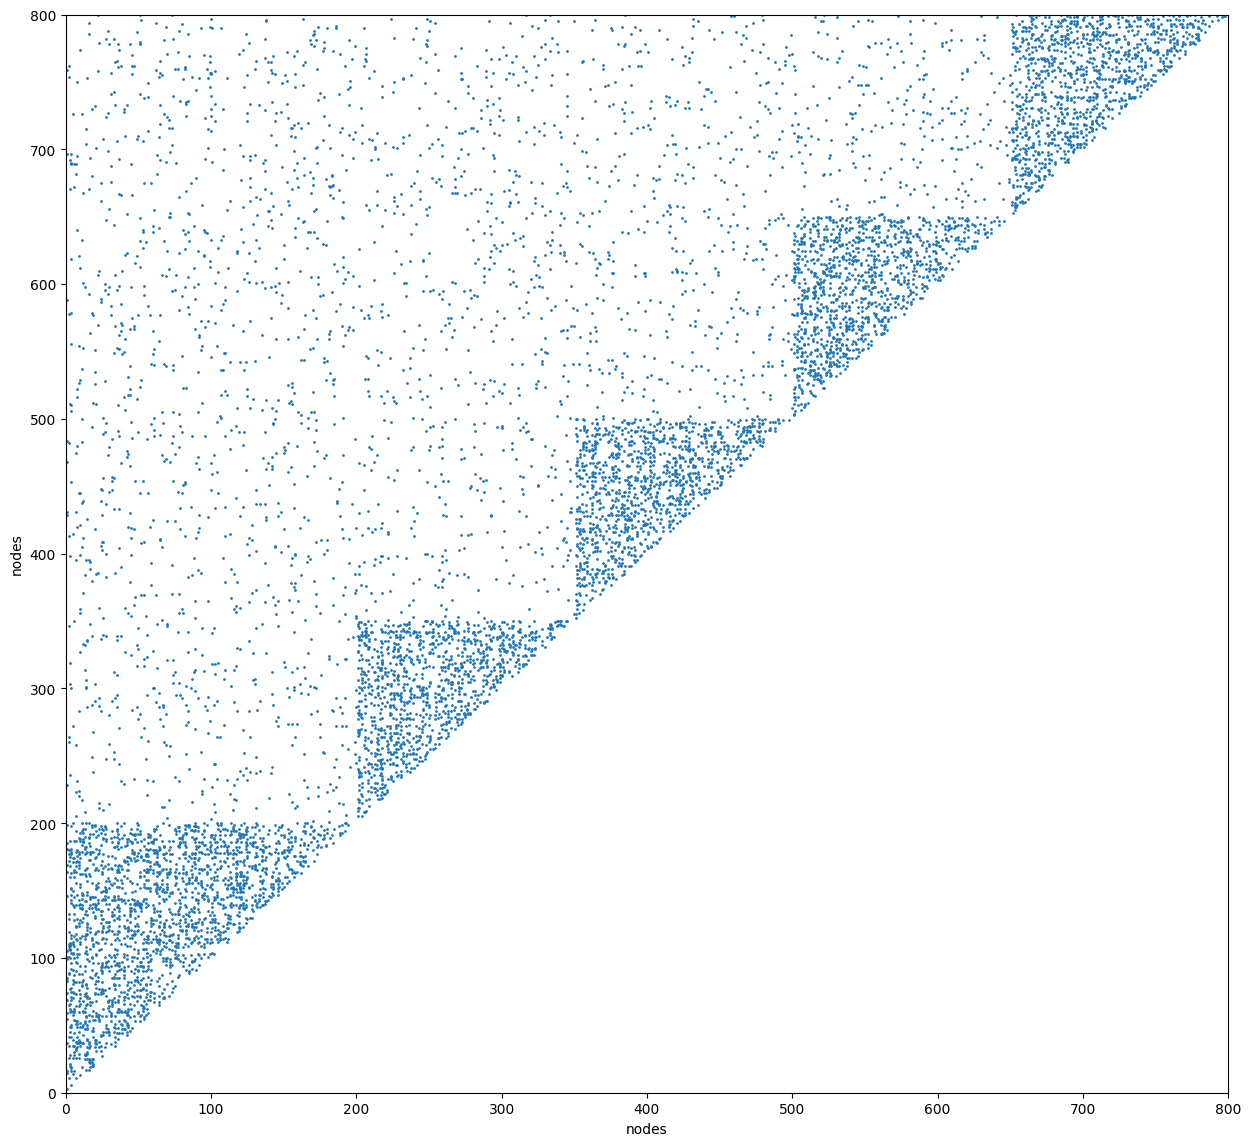

┌ Warning: `range(start, stop)` (with neither `length` nor `step` given) is deprecated, use `range(start, stop=stop)` instead.
│   caller = top-level scope at In[50]:1
└ @ Core In[50]:1


In [50]:
spy_sparse_order(sparse_data, range(1,n), save=false)

In [51]:
pwd()

"/Users/ayedm/Documents/community detect code/BNP_factorization_last"

In [52]:
#-------------------------------------------------------------------------------
# Save folder
#-------------------------------------------------------------------------------
# Path to the folder where to store the information
main_dir = pwd()
current_dir = "data/data_sbm_800"
data_name = "data_sbm_800"

# Saving main informations about the run in a txt file
println("Saving in "*current_dir)
println()
save_path = string(main_dir, "/", current_dir, '/')
mkpath(save_path)
open(save_path*"info.txt","w") do f
  write(f,"Dataset:\n")
  write(f,string("  name = ", data_name, "\n"))
  write(f,string("  number of nodes = ", n, "\n"))
  write(f,string("  number of edges = ", sum(sparse_data),"\n"))
  write(f,string("  directed = false","\n"))
  write(f,string("  weighted = false", "\n\n"))

  write(f,"Initial parameters:\n")
  write(f,string("  K = ", 3,"\n"))
  write(f,string("  Communitites sizes = ", clusters_sizes,"\n"))
  write(f,string("  p_in = ", p_in,  "\n"))
  write(f,string("  p_out = ", p_out,  "\n"))
end


Saving in data/data_sbm_800



15

In [53]:
# Save datasets (small, medium, large)
I_,J_,Val_ = findnz(sparse_data)
writedlm(string("data/", data_name, ".txt"), hcat(I_, J_, Val_))

In [39]:
10^(1.5)

31.622776601683793